#### Student Name: Mai Ngo
#### Course Name and Number: DSC 478 Programming Machine Learning Applications
#### Assignment 2
#### Date: 4/30/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter
%matplotlib inline

### K-Nearest Neighbor (KNN) classification on Newsgroups.

Note: I have converted TFxIDF to both test and train datasets. Adding 1 to zero values in test set per homework note. I also using numpy array for the first question. \
Break down: 1000 documents, 5500 terms. \
Train set: 5500 terms = 5500 rows | 800 documents = 800 columns. \
Test set: 5500 terms = 5500 rows | 200 documents = 200 columns.

a. Create your own K-Nearest-Neighbor classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K (number of neighbors), and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function (an example implementation of a KNN classifier was provided in class examples). 

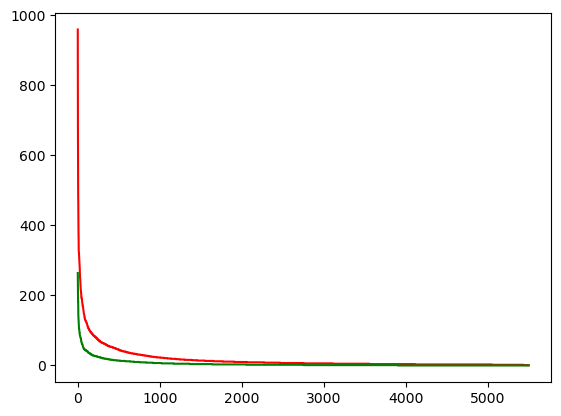

In [2]:
#Import all documents as numpy array.
testMatrix = np.loadtxt('testMatrixModified.txt')
trainMatrix = np.loadtxt('trainMatrixModified.txt')
trainClasses = np.loadtxt('trainClasses.txt', dtype = int)
testClasses = np.loadtxt('testClasses.txt', dtype = int)
terms = np.loadtxt('modifiedterms.txt', dtype = str)

#Transpose for document-term matrix. Documents as rows, terms as columns. 
testMatrix_T = testMatrix.transpose()
trainMatrix_T = trainMatrix.transpose()

#Get terms frequency accross each document. Show how manytimes ith term shows in jth document.
testTerms_freq = testMatrix.sum(axis=1)
trainTerms_freq = trainMatrix.sum(axis=1)
plt.plot(sorted(trainTerms_freq, reverse=True), color = 'red')
plt.plot(sorted(testTerms_freq, reverse=True), color = 'green')
plt.show()

In [3]:
print (f"Training data shape: {trainMatrix.shape}")
print (f"Test data shape: {testMatrix.shape}")
print (f"Training label shape: {trainClasses.shape}")
print (f"Test label shape: {testClasses.shape}")

Training data shape: (5500, 800)
Test data shape: (5500, 200)
Training label shape: (800, 2)
Test label shape: (200, 2)


In [4]:
def knnClassifier (trainData, trainLabel, instance, K, measure):
    """Find K nearest neighbors of the input instance among training dataset."""
    """Returns predicted class label of the input instance and indices of top K neighbors."""
    
    if measure == 0:
        #Euclidean.
        distance = np.sqrt(((trainData - instance)**2).sum(axis=1))

    elif measure == 1:
        #Cosine similarity.
        
        #Find the vector norm for each instance/document in trainData.
        D_norm = np.array([np.linalg.norm(trainData[i]) for i in range(len(trainData))])
        
        #Find the vector norm for the predicted instance.
        I_norm = np.linalg.norm(instance)
        
        #Compute Cosine: divide the dot product of the predicted instance versus each document instance in trainData by the product of the two norms.
        sims = np.dot(trainData, instance)/(D_norm * I_norm)
        
        #Cosine distance measure will be the inverse of Cosine similarity.
        distance = 1 - sims
    
    #Using argsort() to get documents index rank. 
    index = np.argsort(distance)
    K_index = index[:K]
    
    KNN_Classes = []
    
    for i in K_index:      
        for j in trainLabel[:,0]: #Compared to the first value. 
            if i == j:
                #Select class label value in second column, make sure to only append 1 value. 
                KNN_Classes.append(trainLabel[trainLabel[:,0] == i, 1][0])
    
    classLabels = Counter(KNN_Classes)
    predClass = classLabels.most_common(1)[0][0]
    
    #Return the indexes of top K nearest neighbors and predicted class label.
    return K_index, predClass

In [5]:
#Run a test to make sure the classifier works. Get instance from trainMatrix.
instance = trainMatrix_T[[200]]
test_trainData = np.delete(trainMatrix_T, (200), axis=0)
K_index, predClass = knnClassifier(test_trainData, trainClasses, instance, 5, 0)
print(f"Indices of the top K neighbors: {K_index}")
print(f"Predicted class: {predClass}")

#Check to see if the 200th instance has the same class label. 
actualy_predClass = trainClasses[[200]]
print(f"Actual predicted class: {actualy_predClass}")

Indices of the top K neighbors: [463 797 756 119 223]
Predicted class: 1
Actual predicted class: [[200   1]]


b. Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances).

In [6]:
def classifierAccuracy (trainData, trainLabel, testData, testLabel, K, measure):
    '''Evaluation function of the KNN classifier.'''
    '''Returns classification accuracy: predicted versus actual class label.'''
    
    correctCount = 0.0
    
    numTest = len(testData)
    for instance in range(numTest):
        K_index, predClass = knnClassifier (trainData, trainLabel, testData[instance,:], K, measure)
        #Take the first character of predClass. Convert numpy array to string for comparison.
        if predClass == testLabel[instance, 1]:
            correctCount += 1.0 
    
    accuracyRatio = correctCount/numTest
    return accuracyRatio

In [7]:
#Run a test to make sure the function works. Using all given dataset.
accuracyRatio = classifierAccuracy(trainMatrix_T, trainClasses, testMatrix_T, testClasses, 5, 0)
print(f"Classification Accuracy: {accuracyRatio}") 

Classification Accuracy: 0.815


c. Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Euclidean distance version vs. cosine similarity version).

In [8]:
#Euclidean Distance.
Euclid = []
for k in range(5, 101, 5):
    accuracyE = classifierAccuracy(trainMatrix_T, trainClasses, testMatrix_T, testClasses, k, 0)
    Euclid.append(accuracyE)
print(Euclid)

[0.815, 0.85, 0.785, 0.765, 0.73, 0.725, 0.69, 0.7, 0.655, 0.67, 0.655, 0.66, 0.625, 0.625, 0.63, 0.615, 0.615, 0.61, 0.605, 0.605]


In [9]:
#Cosine Similarity.
Cosine = []
for k in range(5, 101, 5):
    accuracyC = classifierAccuracy(trainMatrix_T, trainClasses, testMatrix_T, testClasses, k, 1)
    Cosine.append(accuracyC)
print(Cosine)

[0.97, 0.985, 0.985, 0.975, 0.97, 0.98, 0.98, 0.98, 0.975, 0.98, 0.975, 0.98, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975]


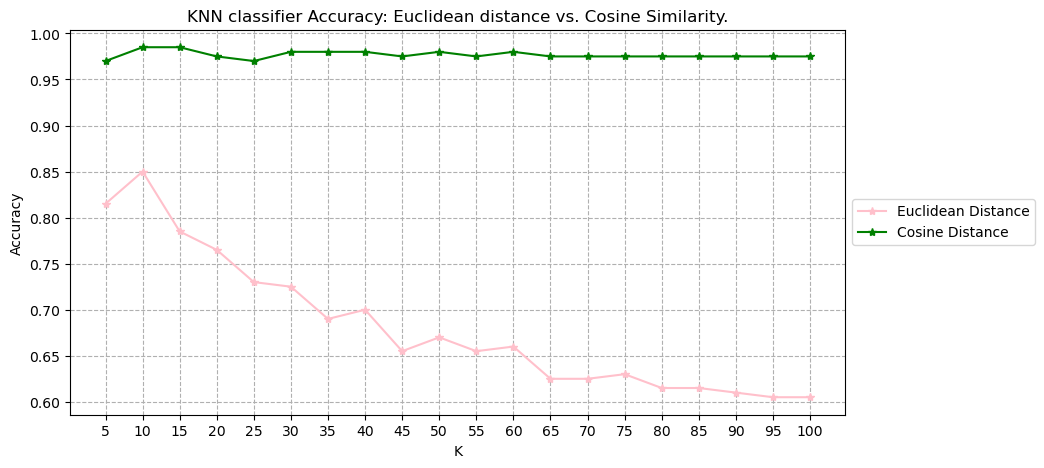

In [10]:
#Plot to compare the two distance measures. 
Ks = list(range(5, 101, 5))
plt.figure(figsize=(10,5))

plt.plot(Ks, Euclid, marker = "*", label = 'Euclidean Distance', color = 'pink')
plt.plot(Ks, Cosine, marker = "*", label='Cosine Distance', color = 'green')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN classifier Accuracy: Euclidean distance vs. Cosine Similarity.')

plt.grid(linestyle = 'dashed')
plt.xticks(Ks)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.show()

d. Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). Then, rerun your evaluation (only for the Cosine similarity version of the classifier) on the range of K values (as above) and create a chart comparing the results with and without using TFxIDF weights.

In [11]:
#Work with original term-document matrix.
#Get document frequency df for each term in both test and train data. 
dfTest = np.count_nonzero(testMatrix, axis=1).reshape(-1, 1)
dfTrain = np.count_nonzero(trainMatrix, axis=1).reshape(-1, 1)
print(dfTest)
print("\n")
print(dfTrain)
print("\n")

#At this point I noticed some df values in the test data set has 0 value. 
#Double check. False = contains 0 value. 
print(f"Test set does not have 0 value: {all(dfTest)}")
print(f"Train set does not have 0 value: {all(dfTrain)}")

[[15]
 [ 0]
 [ 1]
 ...
 [ 1]
 [ 1]
 [ 1]]


[[50]
 [ 7]
 [10]
 ...
 [ 2]
 [ 2]
 [ 2]]


Test set does not have 0 value: False
Train set does not have 0 value: True


In [12]:
#Add 1 to zero values in the test data. Suggested by the assignment.
zeroVal = np.where(dfTest == 0)[0]
dfTest[zeroVal] += 1

In [13]:
#Create base matrix for both test and train data.
testNDocs = testMatrix.shape[1]
MatrixTD_test=np.ones(np.shape(testMatrix), dtype=float)*testNDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(MatrixTD_test)
print("\n")
      
trainNDocs = trainMatrix.shape[1]
MatrixTD_train=np.ones(np.shape(trainMatrix), dtype=float)*trainNDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(MatrixTD_train)

[[200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 ...
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]]


[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


In [14]:
#Convert to IDF values for both test and train data.
IDF_test = np.log2(np.divide(MatrixTD_test, dfTest))
print(IDF_test)
print("\n")
IDF_train = np.log2(np.divide(MatrixTD_train, dfTrain))
print(IDF_train)

[[3.74 3.74 3.74 ... 3.74 3.74 3.74]
 [7.64 7.64 7.64 ... 7.64 7.64 7.64]
 [7.64 7.64 7.64 ... 7.64 7.64 7.64]
 ...
 [7.64 7.64 7.64 ... 7.64 7.64 7.64]
 [7.64 7.64 7.64 ... 7.64 7.64 7.64]
 [7.64 7.64 7.64 ... 7.64 7.64 7.64]]


[[4.   4.   4.   ... 4.   4.   4.  ]
 [6.84 6.84 6.84 ... 6.84 6.84 6.84]
 [6.32 6.32 6.32 ... 6.32 6.32 6.32]
 ...
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]]


In [15]:
#Compute the TFxIDF values for each document-term entry for both test and train data.
TFIDF_test = testMatrix * IDF_test
print(TFIDF_test)
print("\n")
TFIDF_train = trainMatrix * IDF_train
print(TFIDF_train)

[[0.   0.   3.74 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


[[ 8.    0.    0.   ...  0.    0.    0.  ]
 [13.67  0.    0.   ...  0.    0.    0.  ]
 [12.64  0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]


In [16]:
#KNN Search works on document-term matrix. So we transpose.
TFIDF_test_transpose = TFIDF_test.transpose()
TFIDF_train_transpose = TFIDF_train.transpose()

In [17]:
#Cosine Similarity.
Cosine_IDF = []
for k in range(5, 101, 5):
    accuracyC_IDF = classifierAccuracy(TFIDF_train_transpose, trainClasses, TFIDF_test_transpose, testClasses, k, 1)
    Cosine_IDF.append(accuracyC_IDF)
print(Cosine_IDF)

[0.97, 0.99, 0.995, 0.995, 0.99, 0.995, 0.995, 1.0, 0.99, 0.995, 0.99, 0.995, 0.995, 0.995, 0.99, 0.995, 0.995, 0.99, 0.985, 0.995]


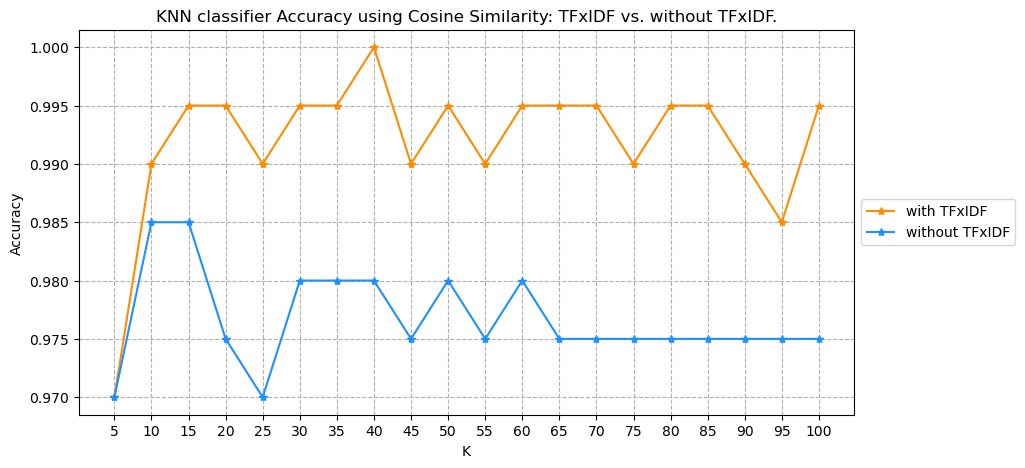

In [18]:
#Plot to compare the Cosine Similarity measure between with and without using TFxIDF weights. 
Ks = list(range(5, 101, 5))
plt.figure(figsize=(10,5))

plt.plot(Ks, Cosine_IDF, marker = "*", label = 'with TFxIDF', color = 'darkorange')
plt.plot(Ks, Cosine, marker = "*", label='without TFxIDF', color = 'dodgerblue')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN classifier Accuracy using Cosine Similarity: TFxIDF vs. without TFxIDF.')

plt.grid(linestyle = 'dashed')
plt.xticks(Ks)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.show()

We can see that with TF*IDF, the KNN classifier gives better accuracy results. 

e. Create a new classifier based on the Rocchio Method (also know as the "nearest centroid" method) adapted for text categorization. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes.  Finally, use your evaluation function to compare your results to the best KNN results you obtained in part 

In [71]:
def Rocchio_train(trainData, trainLabel):
    '''Take training data and label and return prototype vectors for class labels using Rocchio method.'''
    
    #Get class labels.
    classes = np.unique(trainLabel[:, [1]])

    #Initialize dictionary to store prototype vectors.
    prototypeVectors = {}
    
    for c in classes:
        #Get the row indexes (first column) in trainLabel (second column) that equal to class c.
        rowIndexes = np.where(trainLabel[:, 1] == c)[0]
        
        #Sum all rows to get prototype vectors for each class.
        prototypeVector = np.sum(trainData[rowIndexes], axis=0)
        prototypeVectors[c] = prototypeVector
    
    return prototypeVectors

In [20]:
#Run a test to make sure the function works. Using test dataset.
testPV = Rocchio_train(trainMatrix_T, trainClasses)
print(f"Test Matrix Prototype vectors: {testPV}") 

Test Matrix Prototype vectors: {0: array([57.,  4.,  5., ...,  1.,  2.,  2.]), 1: array([45.,  7., 17., ...,  1.,  0.,  0.])}


In [21]:
def Rocchio_Classifier(prototype_vectors, instance):
    '''Classifier using Rocchio method, return predicted class and Cosine similary distance between to instance and each class label.'''
    
    #Initialize dictionary to store Cosine Similarity values.
    cosineSim_Values = {}
    
    #Get class labels and corresponding prototype vectors.
    for c, prototypeVector in prototype_vectors.items():
        
        #Calculate Cosine Similarity with new instance.
        cosineSim = np.dot(instance, prototypeVector) / (np.linalg.norm(instance) * np.linalg.norm(prototypeVector))
        cosineSim_Values[c] = cosineSim
    
    #Get the predicted class label with the highest value.
    predClass = max(cosineSim_Values, key = cosineSim_Values.get)
    
    return predClass, cosineSim_Values

In [22]:
#Run a test to make sure the function works. Using test dataset.
prot = Rocchio_train(trainMatrix_T, trainClasses)
instance = testMatrix_T[[150]]
testRocc = Rocchio_Classifier(prot, instance)
print(testRocc)

(1, {0: array([0.13]), 1: array([0.41])})


In [72]:
def Rocchio_classifierAccuracy (trainData, trainLabel, testData, testLabel):
    '''Evaluation function of the KNN classifier.'''
    '''Returns classification accuracy: predicted versus actual class label.'''
    
    #Calling Rocchio_train() to get prototype vectors.
    prototypes = Rocchio_train(trainData, trainLabel)
    
    correctCount = 0.0
    numTest = len(testData)
    
    for instance in range(numTest):
        predClass, cosineSim_Values = Rocchio_Classifier(prototypes, testData[instance,:])
        #Take the first character of predClass. Convert numpy array to string for comparison.
        if predClass == testLabel[instance, 1]:
            correctCount += 1.0 
    
    accuracyRatio = correctCount/numTest
    
    return accuracyRatio

In [73]:
accuracy1 = Rocchio_classifierAccuracy (trainMatrix_T, trainClasses, testMatrix_T, testClasses)
print (f"Accuracy with Rocchio Method - without TFxIDF: {accuracy1}")

Accuracy with Rocchio Method - without TFxIDF: 0.975


In [25]:
accuracy2 = Rocchio_classifierAccuracy (TFIDF_train_transpose, trainClasses, TFIDF_test_transpose, testClasses)
print (f"Accuracy with Rocchio Method - with TFxIDF: {accuracy2}")

Accuracy with Rocchio Method - with TFxIDF: 0.98


In [26]:
print (f"Highest accuracy KNN classifier with TFxIDF: {max(Cosine_IDF)}")
print (f"Average accuracy KNN classifier with TFxIDF: {sum(Cosine_IDF)/len(Cosine_IDF)}")
print ("\n")
print (f"Highest accuracy KNN classifier without TFxIDF: {max(Cosine)}")
print (f"Average accuracy KNN classifier without TFxIDF: {sum(Cosine)/len(Cosine)}")

Highest accuracy KNN classifier with TFxIDF: 1.0
Average accuracy KNN classifier with TFxIDF: 0.9919999999999998


Highest accuracy KNN classifier without TFxIDF: 0.985
Average accuracy KNN classifier without TFxIDF: 0.9767500000000002


Overall, the maximum accuracy I got is from the KNN classifier - Cosine_IDF of 1.0 with k = 40. Based on the average, KNN classifier - Cosine_IDF also has the highest accuracy of 0.99. With Rocchio method, TFxIDF gives higher accuracy score of 0.98; which is not much different compared to KNN classifier given much faster running time. 

f. Using scikit-learn's Nearest Centroid classifier to perform classification of the test instances, as in the previous part. Compare the classification accuracy of your Rocchio implementation in part e to the classification results using scikit-learn.

In [27]:
from sklearn.neighbors import NearestCentroid
nearestC = NearestCentroid()

#Fit train data to the classifier.
nearestC = nearestC.fit(trainMatrix_T, trainClasses[:, 1])

print(f"Nearest Centroid - Accuracy Training Set Score : {nearestC.score(trainMatrix_T, trainClasses[:, 1])}")
print(f"Nearest Centroid - Accuracy Test Set Score : {nearestC.score(testMatrix_T, testClasses[:, 1])}")

Nearest Centroid - Accuracy Training Set Score : 0.93625
Nearest Centroid - Accuracy Test Set Score : 0.94


Accuracy with Rocchio Method - without TFxIDF: 0.975 \
Accuracy with Rocchio Method - with TFxIDF: 0.98 \
Scikit-learn's Nearest Centroid - Accuracy Test Set Score : 0.94 \
Given both Training and Test scores are almost similar, the Nearest Centroid classifier is well performed. \
Overall, Scikit-learn's Nearest Centroid gives lowest accuracy. Given same running time between both classifiers. I think Rocchio is the most effective classifier. 

### Classification / Predicting Modeling with scikit-learn.

a. Load the data into a Pandas dataframe. Create dummy variables for the categorical attributes so that the data set is fully numeric. Then separate the attribute ("income_>50K") from the remaining attributes; this will be used as the target attribute for classification.

In [28]:
pdAdult = pd.read_csv("adult-modified.csv") 
pdAdult.shape
#Read data as Pandas dataframe and get number of rows and columns.

(9412, 8)

In [29]:
pdAdult

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9407,38,Private,10,Married,White,Male,60,>50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K


In [30]:
#Create dummy variables.
dummyAdult = pd.get_dummies(pdAdult)
#Drop "income_<=50K" attribute.
dummyAdult = dummyAdult.drop(['income_<=50K'], axis=1)
dummyAdult.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,1


In [31]:
#Separate attribute "income_>50K"
target = dummyAdult['income_>50K']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [32]:
predictors = dummyAdult.drop(columns=['income_>50K'])
predictors.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [33]:
dummyAdult.columns

Index(['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_White', 'sex_Female', 'sex_Male', 'income_>50K'],
      dtype='object')

In [34]:
#Split the data into train and test sets (80%, 20%).
from sklearn.model_selection import train_test_split
trainSet, testSet, trainTarget, testTarget = train_test_split(predictors, target, test_size=0.2, random_state=33)

print(trainSet.shape)
trainSet[0:5]

(7529, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
272,50,10,45,1,0,0,0,1,0,0,0,0,1,0,1
7383,41,9,40,1,0,0,0,1,0,0,0,0,1,1,0
5508,38,9,50,0,1,0,0,1,0,0,0,0,1,0,1
4471,44,9,40,1,0,0,0,1,0,0,0,0,1,1,0
6138,21,10,45,1,0,0,0,1,0,0,0,0,1,0,1


In [35]:
print(testSet.shape)
testSet[0:5]

(1883, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
7917,56,10,45,1,0,0,1,0,0,0,0,0,1,0,1
2456,54,9,45,1,0,0,1,0,0,0,0,0,1,0,1
2358,52,11,35,1,0,0,0,1,0,0,0,0,1,1,0
6709,42,16,60,0,0,1,1,0,0,0,0,0,1,0,1
5523,30,9,50,0,0,1,1,0,0,0,0,0,1,0,1


b. Use scikit-learn's KNN implementation for classification.

1. First normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Run your KNN classifier using K=10. Generate the confusion matrix (visualize it using Matplotlib) as well as the classification report. Report the model accuracy for both the training and the test sets.

In [36]:
from sklearn import preprocessing
min_max_Scaler = preprocessing.MinMaxScaler().fit(trainSet)

#Convert to pandas dataframe.
trainNorm = min_max_Scaler.transform(trainSet)
trainNorm = pd.DataFrame(trainNorm, columns=trainSet.columns, index=trainSet.index)

#Use the same scaler for the test set.
testNorm = min_max_Scaler.transform(testSet)
testNorm = pd.DataFrame(testNorm, columns=testSet.columns, index=testSet.index)

In [37]:
trainNorm.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
272,0.452055,0.600000,0.448980,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7383,0.328767,0.533333,0.397959,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5508,0.287671,0.533333,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4471,0.369863,0.533333,0.397959,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6138,0.054795,0.600000,0.448980,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [38]:
testNorm.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
7917,0.534247,0.600000,0.448980,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2456,0.506849,0.533333,0.448980,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2358,0.479452,0.666667,0.346939,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6709,0.342466,1.000000,0.602041,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5523,0.178082,0.533333,0.500000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [39]:
#Run KNN classifier using K=10
from sklearn import neighbors, tree, naive_bayes
k_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(k_neighbors, weights='distance')
knnclf.fit(trainNorm, trainTarget)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [40]:
knnpredsTest = knnclf.predict(testNorm)
print(knnpredsTest)

[1 1 0 ... 0 0 1]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(testTarget, knnpredsTest))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1443
           1       0.57      0.48      0.52       440

    accuracy                           0.79      1883
   macro avg       0.71      0.69      0.70      1883
weighted avg       0.78      0.79      0.79      1883



In [42]:
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(testTarget, knnpredsTest)
print(knncm)

[[1283  160]
 [ 228  212]]


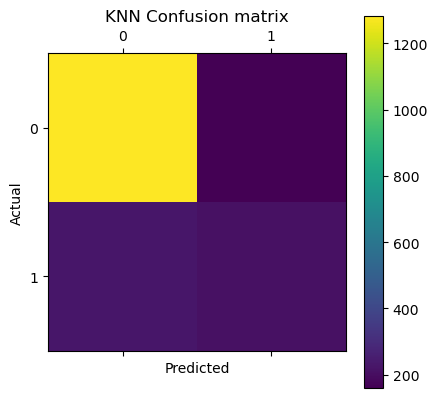

In [43]:
plt.matshow(knncm)
plt.title('KNN Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [87]:
print(f"KNN classifier accuracy - Test data: {knnclf.score(testNorm, testTarget):.3f}")
print(f"KNN classifier accuracy - Train data: {knnclf.score(trainNorm, trainTarget):.3f}")

KNN classifier accuracy - Test data: 0.794
KNN classifier accuracy - Train data: 0.943


With Test accuracy score is clearly lower than Train accuracy score. There is overfitting. 

3. Next, experiment with different values of K (say from 5 to 100) and the weight parameter (i.e., with or without distance weighting) to see if you can improve accuracy of the KNN classifier. Show the results in a single plot comparing distance and uniform weighting schemes across the different values of K. Use the best values of these parameter (K and weighting scheme) to train a new KNN classifier and report the accuracy of this classifier on the training and test sets.

In [45]:
import warnings
warnings.filterwarnings('ignore')
weightList = ['uniform', 'distance']
kList = list(range(5, 101))

trainScore_lst = []
testScore_lst = []

for weight in weightList:
    for k in kList:
        knn = neighbors.KNeighborsClassifier(k, weights = weight)
        knn.fit(trainNorm, trainTarget)
        trainScore = knn.score(trainNorm, trainTarget)
        testScore = knn.score(testNorm, testTarget)
        trainScore_lst.append(trainScore)
        testScore_lst.append(testScore)

In [46]:
#Put results into 2 numpy arrays for plotting. 
trainScores = np.array(trainScore_lst).reshape((len(weightList), -1))
testScores = np.array(testScore_lst).reshape((len(weightList), -1))

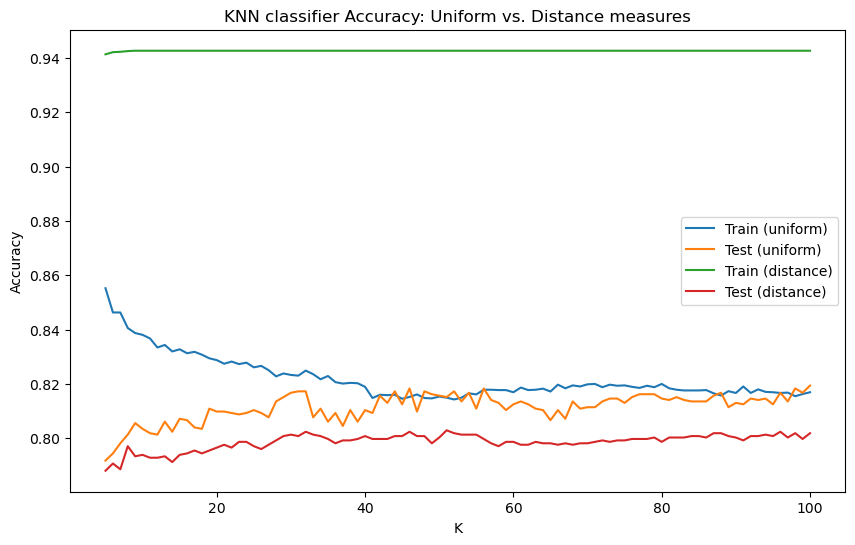

In [47]:
plt.figure(figsize=(10, 6))
for i, weight in enumerate(weightList):
    plt.plot(kList, trainScores[i], label=f'Train ({weight})')
    plt.plot(kList, testScores[i], label=f'Test ({weight})')
plt.title('KNN classifier Accuracy: Uniform vs. Distance measures')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

When I use a different random_state value, for 'uniform' weighting, the intersection is at different k values. Overall, the graph still looks the same. \
For 'distance' weighting, since Test accuracy score is much lower than Train accuracy score, the model is overfitting. \
For 'uniform' weighting, both Test and Train accuracy score getting closer within k = [40, 100]. Thus, the model performs well with 'uniform' weighting.  

In [78]:
#Using argmax() to get the index of best test score in testScores numpy array.
bestIndex = np.argmax(testScores)

#Using unravel_index to get indicies (as tuple) of bestWeight and bestK in testScores numpy array.
bestWeight, bestK = np.unravel_index(bestIndex, testScores.shape)
bestWeight = weightList[bestWeight]
bestK = kList[bestK]

print(f"Best Test score: {testScore_lst[bestIndex]:.3f}")
print(f"Best weight: {bestWeight}")
print(f"Best k: {bestK}")

Best Test score: 0.819
Best weight: uniform
Best k: 100


In [76]:
#KNN classifier with best parameters.
bestKNN = neighbors.KNeighborsClassifier(bestK, weights = bestWeight)
bestKNN.fit(trainNorm, trainTarget)

# Evaluate the performance of the KNN classifier on the training and test sets
best_trainScore = bestKNN.score(trainNorm, trainTarget)
best_testScore = bestKNN.score(testNorm, testTarget)

print(f"Training accuracy - best parameters: {best_trainScore:.3f}")
print(f"Test accuracy - best parameters: {best_testScore:.3f}")

Training accuracy - best parameters: 0.817
Test accuracy - best parameters: 0.819


3. Next, using only "uniform" weights, compare the accuracy of the KNN classifier across the different values of K on the training and the test data. You should show the results in a single figure with two line plots for the test and training accuracy values (y-axis) and with values of K in the x-axis. What range of values of K represent overfitting? Briefly explain.

In [50]:
uni_neighbors = list(range(5, 101))

trainAccuracy = []
testAccuracy = []

for k in uni_neighbors:
    knnUni = neighbors.KNeighborsClassifier(k, weights='uniform')
    knnUni.fit(trainNorm, trainTarget)
    uni_trainScores = knnUni.score(trainNorm, trainTarget)
    uni_testScores = knnUni.score(testNorm, testTarget)
    trainAccuracy.append(uni_trainScores)
    testAccuracy.append(uni_testScores)

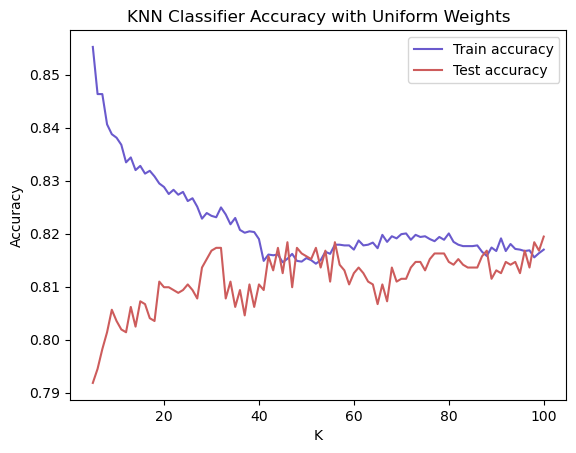

In [51]:
#Plot results.
plt.plot(uni_neighbors, trainAccuracy, label='Train accuracy', color = 'slateblue' )
plt.plot(uni_neighbors, testAccuracy, label='Test accuracy', color = 'indianred')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy with Uniform Weights')
plt.legend()
plt.show()

Range of k represent overfitting k = [5, 40] 
Within this range, the Train accuracy is higher than the Test accuracy which means the model performs well on training data, but not testing. For range k = [5, 30], training accruacy are signigicantly higher than testing, range k = [30, 40], the accuracy gap gets smaller. In this case, overfitting happens initially potentially because small number of k neighbors.

c. Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). As above, generate the confusion matrix, classification report, and average accuracy scores of the classifier. Compare the average accuracy score on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off? Next, create another decision tree model (trained on the non-normalized training data) using "gini" index as the selection criteria, min_samples_split=10, and max_depth=4. Show the accuracy results for both the training and test sets. For this model generate a visualization of tree  embedded in the Jupyter Notebook.

In [52]:
#Non-normalized data.
trainSet.head(5)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
272,50,10,45,1,0,0,0,1,0,0,0,0,1,0,1
7383,41,9,40,1,0,0,0,1,0,0,0,0,1,1,0
5508,38,9,50,0,1,0,0,1,0,0,0,0,1,0,1
4471,44,9,40,1,0,0,0,1,0,0,0,0,1,1,0
6138,21,10,45,1,0,0,0,1,0,0,0,0,1,0,1


In [53]:
testSet.head(5)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
7917,56,10,45,1,0,0,1,0,0,0,0,0,1,0,1
2456,54,9,45,1,0,0,1,0,0,0,0,0,1,0,1
2358,52,11,35,1,0,0,0,1,0,0,0,0,1,1,0
6709,42,16,60,0,0,1,1,0,0,0,0,0,1,0,1
5523,30,9,50,0,0,1,1,0,0,0,0,0,1,0,1


In [54]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(trainSet, trainTarget)
treepredsTest = treeclf.predict(testSet)
print(treepredsTest)

[0 1 0 ... 0 0 1]


In [55]:
#Generate confusion matrix.
treecm = confusion_matrix(testTarget, treepredsTest)
print(treecm)

[[1253  190]
 [ 250  190]]


In [56]:
#Generate classification report.
print(classification_report(testTarget, treepredsTest))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1443
           1       0.50      0.43      0.46       440

    accuracy                           0.77      1883
   macro avg       0.67      0.65      0.66      1883
weighted avg       0.76      0.77      0.76      1883



In [79]:
#Generate average accuracy score.
print(f"Decision Tree classifier accuracy - Test data: {treeclf.score(testSet, testTarget):.3f}")
print(f"Decision Tree classifier accuracy - Train data: {treeclf.score(trainSet, trainTarget):.3f}")

Decision Tree classifier accuracy - Test data: 0.766
Decision Tree classifier accuracy - Train data: 0.943


Based on the average accuracy scores of both  Test and Train data. Test data has lower score , 17.3% difference, than Train data score. This indicates that the model is overfitting to the training data. \
With training data, accuracy score = 0.9426, shows that the model performs well on training data thus, low-bias. With test data, accuracy score = 0.769, shows that the model does not perform well on unseen data thus, high variance. \
The bias–variance tradeoff means that the variance of the parameter estimated across samples can be reduced by increasing the bias in the estimated parameters.
Therefore, we will need to pruning the tree aka. increasing the bias in the estimated parameters to improve the classifier performance. 

In [81]:
giniTree = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10, max_depth=4)
giniTree = giniTree.fit(trainSet, trainTarget)

# Print the accuracy of the model
print(f"Decision Tree classifier with Gini index accuracy - Test data: {giniTree.score(testSet, testTarget):.3f}")
print(f"Decision Tree classifier with Gini Index accuracy - Train data: {giniTree.score(trainSet, trainTarget):.3f}")

Decision Tree classifier with Gini index accuracy - Test data: 0.817
Decision Tree classifier with Gini Index accuracy - Train data: 0.819


We can see that after pruning, Test and Train accuracy score are alsmot similar. 

In [59]:
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

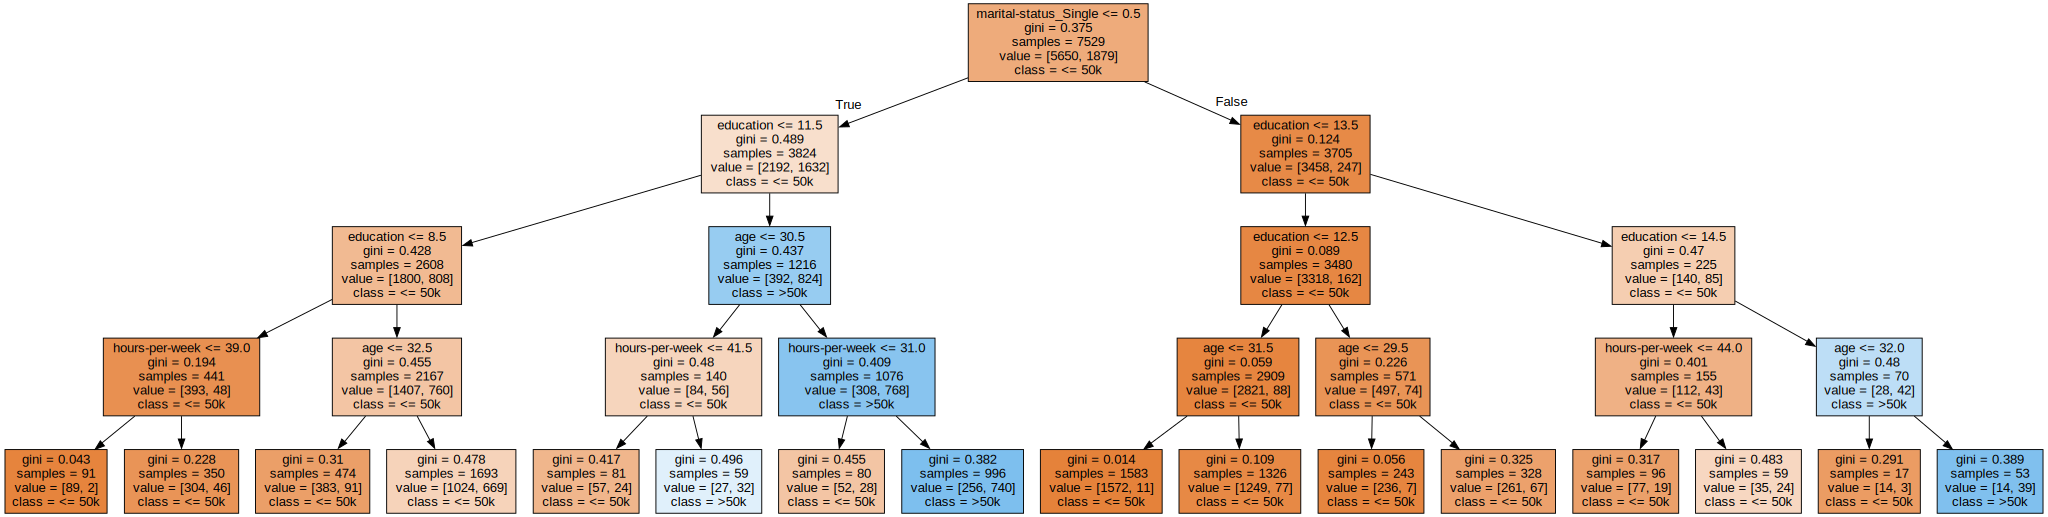

In [60]:
#Class labels: 0 = low-income <= 50k; 1 = high income >50k
export_graphviz(giniTree,out_file='giniTree.dot', feature_names=trainSet.columns, class_names=["<= 50k",">50k"], filled=True)

with open("giniTree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.format = 'png'
graph.render('giniTree', view=True, format='png')
graph

d. Use scikit-learn to build classifiers using Naive Bayes (Gaussian) and linear discriminant analysis (LDA).  For each of these perform 10-fold cross-validation on the 80% training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this cross-validation accuracy to the model accuracy on the training data as a whole. Finally, run your model on the set-aside 20% test data.

#### Naive Bayes (Gaussian)

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(trainSet, trainTarget)

In [82]:
print(f"Naive Bayes classifier - Gaussian accuracy - Test data: {nbclf.score(testSet, testTarget):.3f}")
print(f"Naive Bayes classifier - Gaussian accuracy - Train data: {nbclf.score(trainSet, trainTarget):.3f}")

Naive Bayes classifier - Gaussian accuracy - Test data: 0.719
Naive Bayes classifier - Gaussian accuracy - Train data: 0.721


In [83]:
cv_scoresNaive = cross_val_score(nbclf, trainSet, trainTarget, cv = 10)
print("Naive Bayes Overall Accuracy (cross-validation) - Train data: %0.2f (+/- %0.2f)" % (cv_scoresNaive.mean(), cv_scoresNaive.std() * 2))

Naive Bayes Overall Accuracy (cross-validation) - Train data: 0.72 (+/- 0.02)


Compare cross-validation accuracy (0.72 (+/- 0.02)) to the model accuracy on the training data as a whole (0.721). Both accuracy scores are almost identical. Both Train and test data have similar accuracy score.

In [84]:
#Naive Bayes classification report and confusion matrix.
nbclf_predClass = nbclf.predict(testSet)

print(confusion_matrix(testTarget, nbclf_predClass))
print("\n")
print(classification_report(testTarget, nbclf_predClass))

[[1027  416]
 [ 113  327]]


              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1443
           1       0.44      0.74      0.55       440

    accuracy                           0.72      1883
   macro avg       0.67      0.73      0.67      1883
weighted avg       0.79      0.72      0.74      1883



#### Linear Discrimination Analysis (LDA)

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [67]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(trainSet, trainTarget)

In [85]:
print(f"LDA classifier accuracy - Test data: {ldclf.score(testSet, testTarget):.3f}")
print(f"LDA classifier accuracy - Train data: {ldclf.score(trainSet, trainTarget):.3f}")

LDA classifier accuracy - Test data: 0.810
LDA classifier accuracy - Train data: 0.806


In [69]:
cv_scoresLDA = cross_val_score(ldclf, trainSet, trainTarget, cv = 10)
print("LDA Overall Accuracy (cross-validation) - Train data: %0.2f (+/- %0.2f)" % (cv_scoresLDA.mean(), cv_scoresLDA.std() * 2))

LDA Overall Accuracy (cross-validation) - Train data: 0.81 (+/- 0.03)


Compare cross-validation accuracy (0.81 (+/- 0.03)) to the model accuracy on the training data as a whole (0.806). The overall accuracy score is slightly higher than training data accuracy score, but not significantly different. Both Train and test data have similar accuracy score.

In [86]:
#LDA classification report and confusion matrix.
ldclf_predClass = ldclf.predict(testSet)

print(confusion_matrix(testTarget, ldclf_predClass))
print("\n")
print(classification_report(testTarget, ldclf_predClass))

[[1310  133]
 [ 224  216]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1443
           1       0.62      0.49      0.55       440

    accuracy                           0.81      1883
   macro avg       0.74      0.70      0.71      1883
weighted avg       0.80      0.81      0.80      1883

